In [1]:
from fastapi import FastAPI

app = FastAPI()

In [2]:
app

In [4]:
import logging

In [6]:
logging.info("TEST")

In [35]:
import requests

headers = {
    'accept': 'application/json',
    # Already added when you pass json=
 }

json_data = {
    'prompt': 'a photo of an astronaut riding a horse on mars',
}

response = requests.post('https://1e5f-35-245-3-83.ngrok.io/pipeline', headers=headers, json=json_data)

In [178]:
def process_images(responses):
    images = []
    for response in responses:
        image = Image.open(io.BytesIO(response.content))
        images.append(image)
    return images

class DiffusersClient:

    def __init__(self, endpoint: str):
        self.endpoint = endpoint

    def __call__(self, **kwargs):
        prompt = kwargs.get("prompt")
        _ = self.post(**kwargs)

        return self.get(prompt)

    def post(self, **kwargs):
        headers = {
            'accept': 'application/json',
            # Already added when you pass json=
        }

        json_data = kwargs

        response = requests.post(
            f"{self.endpoint}/pipeline", headers=headers, json=json_data
        )
        return {"num_images":int(response.content)}

    def get(self, prompt:str):
        headers = {
            'accept': 'application/json',
            # Already added when you pass json=
        }
        params = {"prompt":prompt}
        has_images = True
        responses = []

        while has_images:
            response = requests.get(f"{self.endpoint}/get_image", params=params, headers=headers)
            if response.content == b'null':
                has_images = False
            else:
                responses.append(response)
        return process_images(responses)


In [179]:
client = DiffusersClient('https://5304-35-245-3-83.ngrok.io')

In [180]:
responses = client(prompt='a photo of an astronaut riding a horse on mars', num_images_per_prompt=4)

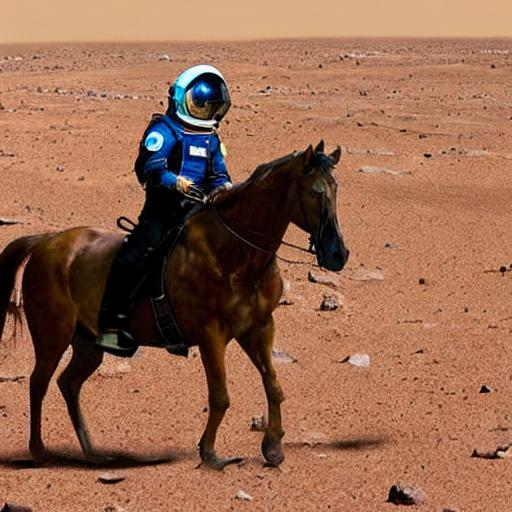

In [185]:
responses[3]

In [186]:
def image_grid(imgs, rows, cols):
    assert len(imgs) == rows*cols

    w, h = imgs[0].size
    grid = Image.new('RGB', size=(cols*w, rows*h))
    grid_w, grid_h = grid.size
    
    for i, img in enumerate(imgs):
        grid.paste(img, box=(i%cols*w, i//cols*h))
    return grid

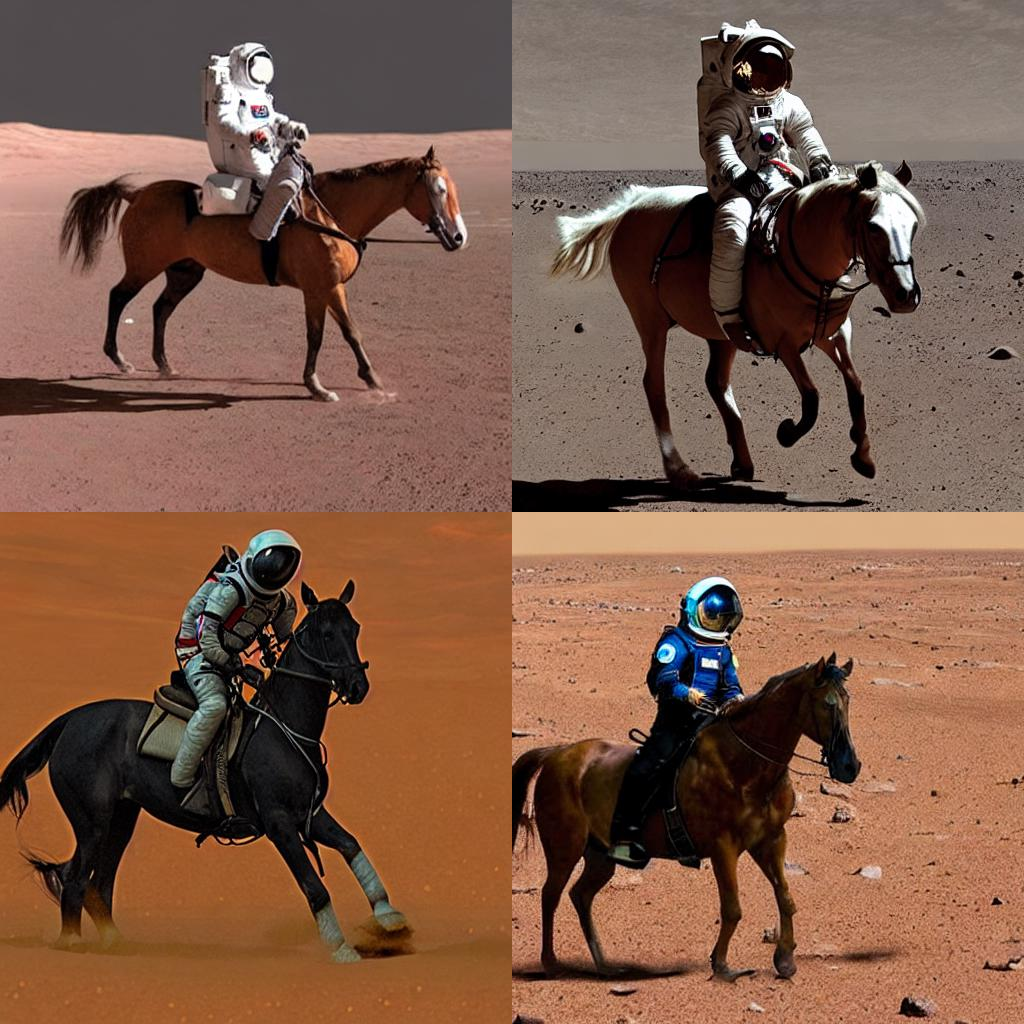

In [187]:
image_grid(responses, 2, 2)